# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [55]:
# Import the modules
import sys

import numpy as np
import pandas as pd
from pandas import read_csv as rcsv
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import mean_absolute_error

import hvplot.pandas
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import kneighbors_graph

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f'Python version {sys.version}')
print(f'pandas version: {pd.__version__}')

Python version 3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
pandas version: 1.5.1


---

# Supplemental Initial Data Exploration

In [3]:
### Read the supplemental_lending_data.csv data from the Resources folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
supp_lend_df = rcsv(
    Path('./Resources/supplemental_lending_data.csv')
)

# confirm 'keys' and review the DataFrame
display(supp_lend_df.columns)
print('\n')
display(supp_lend_df.shape)
print('\n')
display(supp_lend_df.info())
print('\n')
display(supp_lend_df.head(3))

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

(77536, 8)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


None

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0

In [5]:
# Count how many targets category
supp_lend_df['loan_status'].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Create the labels set (y1) from the “loan_status” column, and then create the features (X1) DataFrame from the remaining columns.

In [6]:
# Separate the data into labels and features

# Separate the y variable, the labels
y1 = supp_lend_df['loan_status']

# Separate the X variable, the features
X1 = supp_lend_df.drop(columns = 'loan_status')
# X = borrowers_df.drop('loan_status', axis=1)
# X = borrowers_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]

### Scale the features

In [7]:
# Scale features data values
supp_lend_scaled = StandardScaler().fit_transform(X1)

# Create a DataFrame with the scaled data
df_supp_lend_scaled = pd.DataFrame(
    supp_lend_scaled,
    columns=['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']
)

# confirm 'keys' and review the DataFrame
display(df_supp_lend_scaled.columns)
print('\n')
display(df_supp_lend_scaled.head(3))

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt'],
      dtype='object')

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0   0.427304       0.426837         0.427404        0.668571         0.616143   
1  -0.671487      -0.674918        -0.671552       -0.802166        -0.434049   
2  -0.384846      -0.370249        -0.372922       -0.344424        -0.434049   

   derogatory_marks  total_debt  
0          1.043996    0.427404  
1         -0.673973   -0.671552  
2         -0.673973   -0.372922

### Reduce the number of features to two principal components by using PCA

In [8]:
# Create the PCA model instance where n_components=2
SEED = 42
pca = PCA(n_components=2, random_state = SEED)

In [9]:
# Fit the df_stocks_scaled data to the PCA
supp_lend_scaled_pca_data = pca.fit_transform(df_supp_lend_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
supp_lend_scaled_pca_data[0:5]

array([[ 1.50211599,  0.56907337],
       [-1.73535599, -0.11291934],
       [-1.10464078, -0.30999199],
       [ 1.48445546,  0.57455907],
       [ 1.5601859 ,  0.54981132]])

In [10]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.94885897, 0.03734606])

### Using the PCA data calculated in the previous step, create a new DataFrame called df_supp_lend_scaled_pca

In [11]:
# Creating a DataFrame with the PCA data
df_supp_lend_scaled_pca = pd.DataFrame(
    supp_lend_scaled_pca_data,
    columns=['PC1', 'PC2']
)

### Combine the df_supp_lend_scaled_pca dataframe with loan_status series (y1)

In [12]:
# Concatenate the y1 series with the scaled data DataFrame
df_supp_lend_scaled_pca = pd.concat([df_supp_lend_scaled_pca, y1], axis=1)


### Run the K-means algorithm with the new principal-components data, and then create a scatter plot by using the two principal components for the x and y axes, and by using StockCluster. Be sure to style and format your plot.

In [13]:
# Initialize the K-Means model with n_clusters = 2
model_k2 = KMeans(n_clusters = 2, random_state = SEED)

# Fit the model for the df_stocks_pca DataFrame
model_k2.fit(df_supp_lend_scaled_pca)

KMeans(n_clusters=2, random_state=42)

In [14]:
# Predict the model segments (clusters)
lend_clusters_2 = model_k2.predict(df_supp_lend_scaled_pca)

# View the stock segments
print(lend_clusters_2)

[0 0 0 ... 1 1 1]


In [15]:
# Initialize the K-Means model with n_clusters = 2
model_k3 = KMeans(n_clusters = 3, random_state = SEED)

# Fit the model for the df_stocks_pca DataFrame
model_k3.fit(df_supp_lend_scaled_pca)

KMeans(n_clusters=3, random_state=42)

In [16]:
# Predict the model segments (clusters)
lend_clusters_3 = model_k3.predict(df_supp_lend_scaled_pca)

# View the stock segments
print(lend_clusters_3)

[0 2 2 ... 1 1 1]


In [17]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_supp_lend_scaled_pca_predictions = df_supp_lend_scaled_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_supp_lend_scaled_pca_predictions['LendCluster'] = lend_clusters_2

# Review the DataFrame
display(df_supp_lend_scaled_pca_predictions.shape)
print('\n')
display(df_supp_lend_scaled_pca_predictions.sample(3))

(77536, 4)

PC1       PC2  loan_status  LendCluster
3040   0.713011  0.864266            0            0
34981  1.725056  0.497163            0            0
36260  1.131539  0.729931            0            0

In [18]:
# identify 'keys', i.e. column names
sorted(df_supp_lend_scaled_pca_predictions)

['LendCluster', 'PC1', 'PC2', 'loan_status']

### Create Scatter Plot Visualization

In [19]:
# Create the scatter plot with x="PC1" and y="PC2"
df_supp_lend_scaled_pca_predictions.hvplot.scatter(
    x = 'PC1',
    y = 'PC2',
    by = 'LendCluster',
    # shape = 'loan_status',
    height=600, width=800,
    hover_cols = 'loan_status',
    hover_color = 'magenta',
    title = 'scaled loan data by 2 cluster'
)

:NdOverlay   [LendCluster]
   :Scatter   [PC1]   (PC2,loan_status)

In [20]:
# change cluster column in the DataFrame with the predicted 3 clusters
df_supp_lend_scaled_pca_predictions['LendCluster'] = lend_clusters_3

In [21]:
# Create the scatter plot with x="PC1" and y="PC2"
df_supp_lend_scaled_pca_predictions.hvplot.scatter(
    x = 'PC1',
    y = 'PC2',
    by = 'LendCluster',
    # shape = 'loan_status',
    height=600, width=800,
    hover_cols = 'loan_status',
    hover_color = 'magenta',
    title = 'scaled loan data by 3 cluster'
)

:NdOverlay   [LendCluster]
   :Scatter   [PC1]   (PC2,loan_status)

### Perform KNN regression analysis on the original data

In [22]:
# copy and save the original dataframe
new_supp_lend_df = supp_lend_df.copy()

In [23]:
# confirm 'keys' and review the DataFrame
display(new_supp_lend_df.columns)
print('\n')
display(new_supp_lend_df.shape)
print('\n')
display(new_supp_lend_df.info())
print('\n')
display(new_supp_lend_df.head(3))

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

(77536, 8)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


None

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0

### Create the labels set (yn) from the “loan_status” column, and then create the features (Xn) DataFrame from the remaining columns.

In [24]:
# Separate the data into labels and features

# Separate the y variable, the labels
yn = supp_lend_df['loan_status']

# Separate the X variable, the features
Xn = supp_lend_df.drop(columns = 'loan_status')
# X = borrowers_df.drop('loan_status', axis=1)
# X = borrowers_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]

### Split the original data into training and testing datasets by using train_test_split.

In [25]:
# Split the data using train_test_split
# Assign a random_state of 42 to the function

Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    Xn, yn, 
    test_size=0.2, 
    random_state = SEED
)

### Use describe method to evaluate the features from Xn, transpose.

In [26]:
# use describe and transpose
Xn.describe().T

count          mean          std       min           25%  \
loan_size         77536.0   9805.562577  2093.223153   5000.00   8700.000000   
interest_rate     77536.0      7.292333     0.889495      5.25      6.825000   
borrower_income   77536.0  49221.949804  8371.635077  30000.00  44800.000000   
debt_to_income    77536.0      0.377318     0.081519      0.00      0.330357   
num_of_accounts   77536.0      3.826610     1.904426      0.00      3.000000   
derogatory_marks  77536.0      0.392308     0.582086      0.00      0.000000   
total_debt        77536.0  19221.949804  8371.635077      0.00  14800.000000   

                           50%           75%            max  
loan_size          9500.000000  10400.000000   23800.000000  
interest_rate         7.172000      7.528000      13.235000  
borrower_income   48100.000000  51400.000000  105200.000000  
debt_to_income        0.376299      0.416342       0.714829  
num_of_accounts       4.000000      4.000000      16.000000  
derogatory_marks      0.000000      1.000000       3.000000  
total_debt        18100.000000  21400.000000   75200.000000

### inspect datasets' lengths, i.e. review the split

In [27]:
# inspect the lengths of the full dataset and of split data
display(len(Xn))           # 77536
display(len(Xn_train))      # 62028
display(len(Xn_test))       # 15508

77536

62028

15508

### Feature Scaling for KNN Regression

In [28]:
# Instantiate scaler
scaler = StandardScaler()
# Fit only on X_train
# scaler.fit_transform(X1_train)
Xn_train = scaler.fit_transform(Xn_train)
# Scale X_test
Xn_test = scaler.transform(Xn_test)

### reconstruct scaled dataframe

In [29]:
# Create a DataFrame with the scaled data
col_names=['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income','num_of_accounts', 'derogatory_marks', 'total_debt']
n_scaled_df = pd.DataFrame(Xn_train, columns = col_names)
n_scaled_df

loan_size  interest_rate  borrower_income  debt_to_income  \
0      -0.432618      -0.434333        -0.432652       -0.433333   
1       0.187597       0.210096         0.211504        0.422439   
2      -0.528035      -0.548849        -0.551940       -0.614550   
3       0.807812       0.798391         0.796016        1.055891   
4      -0.146365      -0.135695        -0.134431       -0.013255   
...          ...            ...              ...             ...   
62023   0.283015       0.293176         0.295006        0.520284   
62024   0.044471       0.037201         0.032572        0.203454   
62025   4.147431       4.145159         4.148014        3.261429   
62026  -0.146365      -0.133450        -0.134431       -0.013255   
62027   0.139888       0.156207         0.151860        0.350889   

       num_of_accounts  derogatory_marks  total_debt  
0            -0.434414         -0.672045   -0.432652  
1             0.090110          1.044048    0.211504  
2            -0.434414         -0.672045   -0.551940  
3             0.614634          1.044048    0.796016  
4             0.090110         -0.672045   -0.134431  
...                ...               ...         ...  
62023         0.090110          1.044048    0.295006  
62024         0.090110         -0.672045    0.032572  
62025         4.286303          2.760141    4.148014  
62026         0.090110         -0.672045   -0.134431  
62027         0.090110          1.044048    0.151860  

[62028 rows x 7 columns]

### Training and Predicting KNN Regression

In [30]:
# Instantiate KNN
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(Xn_train, yn_train)

KNeighborsRegressor()

### Make KNN predictions

In [31]:
# make KNN predictions
yn_pred = regressor.predict(Xn_test)

### Evaluate the Algorithm for KNN Regression

In [32]:
# Mean Absolute Error (MAE) and regressor score (R2)
mae = mean_absolute_error(yn_test, yn_pred)
R2 = regressor.score(Xn_test, yn_test)

# print the MAE and R2
print(f'mae: {mae}')
print(f'regressor: {R2}')

mae: 0.008898632963631675
regressor: 0.827884447448129


### Finding the Best K for KNN Regression

#### create a for loop and run models that have from 1 to X neighbors. At each interaction, calculate the MAE and plot the number of Ks along with the MAE result

In [33]:
# create an empty set called 'error'
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(Xn_train, yn_train)
    pred_i = knn.predict(Xn_test)
    mae = mean_absolute_error(yn_test, pred_i)
    error.append(mae)

### plot the error values to find the best MAE

Text(0, 0.5, 'Mean Absolute Error')

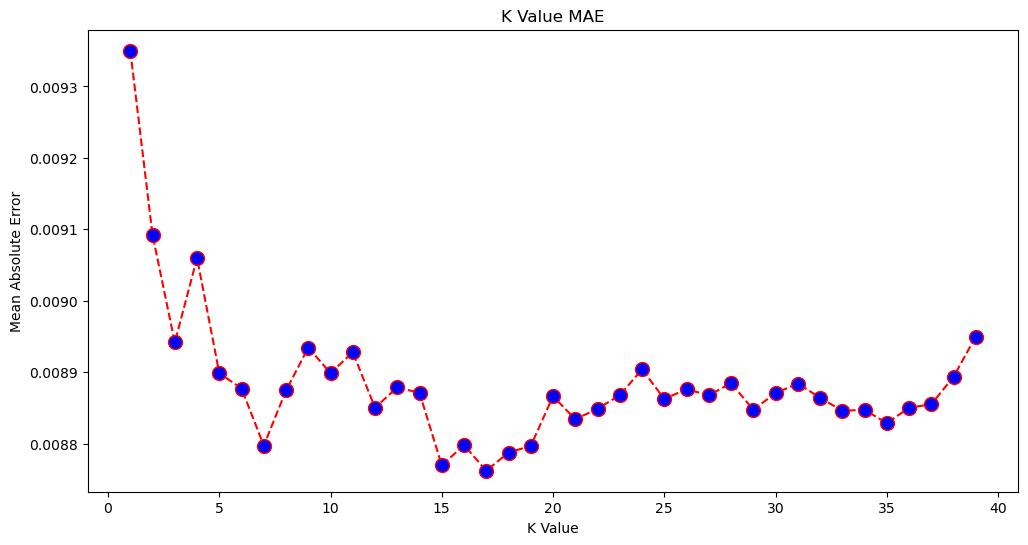

In [34]:
# plot the error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

### It appears as the lowest MAE value is when K is 17. Zoom in on the plot to be sure by plotting less data:

Text(0, 0.5, 'Mean Absolute Error')

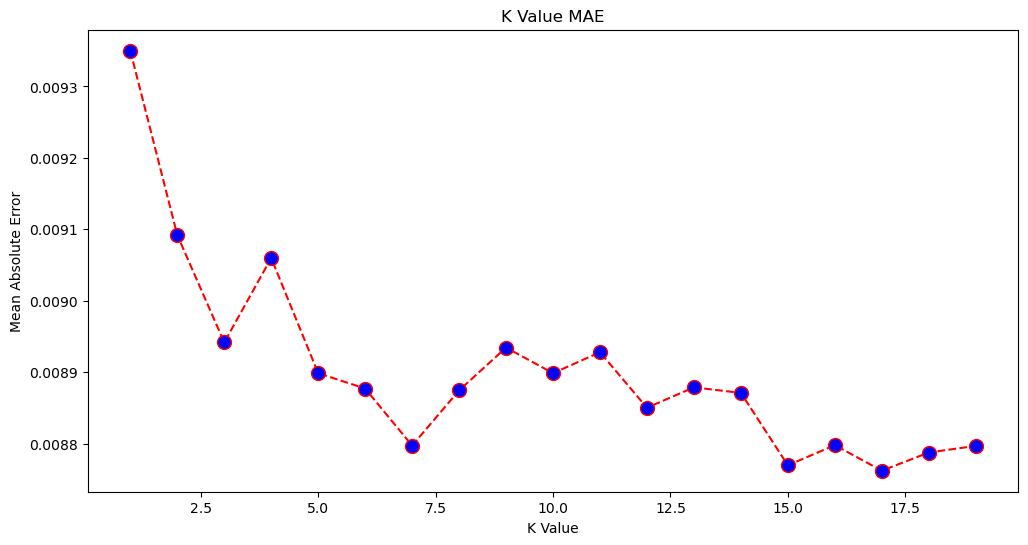

In [35]:
# New error plot, less data
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error[:19], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

### Use NP to obtain the lowest error and the index of that point using the built-in min() function and convert the list into a NumPy array and get the argmin() -(index of the element with the lowest value)
##### Hint: started counting neighbors on 1, while arrays are 0-based, so the 16th index is 17 neighbors

In [36]:
# obtain the lowest error using the built-in min()
print(min(error))               # 0.008762081051146278
# convert the list into a NumPy array and use argmin() to get lowest index of that point
print(np.array(error).argmin()) # 16

0.008762081051146278
16


## Evaluating the Algorithm for KNN Regression
#### Mean Absolute Error (MAE): This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.
#### Regressor score (R2): Tells how much of the changes in data, or data variance are being understood or explained by KNN - the closer to 1 (or 100), the better.

### execute the KNN model and metrics again with 17 neighbors to compare results

In [37]:
knn17 = KNeighborsRegressor(n_neighbors = 17)
knn17.fit(Xn_train, yn_train)
yn_pred17 = knn17.predict(Xn_test)

# Mean Absolute Error (MAE) and regressor score (R2)
mae_17 = mean_absolute_error(yn_test, yn_pred17)
R2_17 = knn17.score(Xn_test, yn_test) 


# print the MAE and R2 comparison with previous metrics

print(f'MAE for n_neighbors = 5: {round(mae, 5)}',
      f'versus n_neighbors = 17: {round(mae_17, 5)}\n',
      'note, lower value is better\n',
      f'\nRegressor R2 for n_neighbors = 5: {round(R2, 3)}',
      f'versus n_neighbors = 17: {round(R2_17, 3)}\n',
      'note, value closest to 1.0 is better')

MAE for n_neighbors = 5: 0.00895 versus n_neighbors = 17: 0.00876
 note, lower value is better
 
Regressor R2 for n_neighbors = 5: 0.828 versus n_neighbors = 17: 0.854
 note, value closest to 1.0 is better


___

### Classification using KNeighborsClassifier on original data

In [38]:
# copy and save the original dataframe
neo_supp_lend_df = supp_lend_df.copy()
# sample the DataFrame
display(neo_supp_lend_df.sample())

loan_size  interest_rate  borrower_income  debt_to_income  \
47506     9700.0          7.226            48600        0.382716   

       num_of_accounts  derogatory_marks  total_debt  loan_status  
47506                4                 0       18600            0

In [57]:
# confirm 'keys'
display(neo_supp_lend_df.columns)

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

### Preprocess Data for Classification
### Create the labels set (ynn) from the “loan_status” column, and then create the features (Xnn) DataFrame from the remaining columns.

In [40]:
# Separate the data into labels and features

# Separate the y variable, the labels
ynn = supp_lend_df['loan_status']

# Separate the X variable, the features
Xnn = supp_lend_df.drop(columns = 'loan_status')
# X = borrowers_df.drop('loan_status', axis=1)
# X = borrowers_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]

### Split the original data into training and testing datasets by using train_test_split.

In [41]:
# Split the data using train_test_split
# Assign a random_state of 42 to the function

Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(
    Xnn, ynn, 
    test_size=0.2, 
    random_state = SEED
)

### Feature Scaling for Classification

In [42]:
# Instantiate scaler
scaler = StandardScaler()
# Fit only on Xnn_train
# scaler.fit(Xnn_train)
Xnn_train = scaler.fit_transform(Xnn_train)
# Scale X_test
Xnn_test = scaler.transform(Xnn_test)

### Training and Predicting for Classification

In [43]:
# Instantiate KNN
classifier = KNeighborsClassifier()
# fit or 'train' KNN
classifier.fit(Xnn_train, ynn_train)

KNeighborsClassifier()

### predict the data classes 

In [44]:
# make KNN classification predictions
ynn_pred = classifier.predict(Xnn_test)

### Evaluate KNN for Classification

In [45]:
# Generate a confusion matrix for the model
ynn_matrix = confusion_matrix(ynn_test, ynn_pred)

# Print the confusion matrix for the original test data
print(ynn_matrix)

[[14939    72]
 [   21   476]]


balanced accuracy score: 0.9764749981468988
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.96      1.00      0.98      0.96     15011
          1       0.87      0.96      1.00      0.91      0.98      0.95       497

avg / total       0.99      0.99      0.96      0.99      0.98      0.96     15508



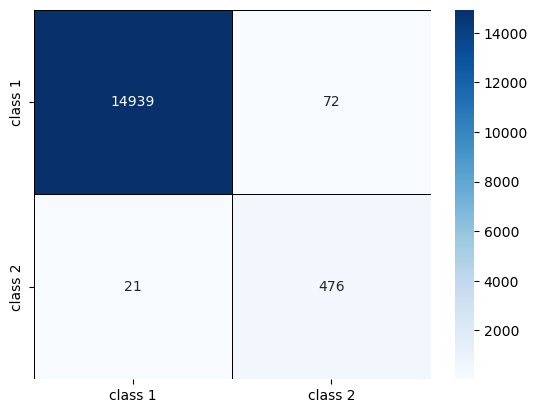

In [46]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(ynn_test, ynn_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues', linewidth =.5, linecolor = 'black');
# Print the balanced_accuracy score of the classifier model
print('balanced accuracy score:', balanced_accuracy_score(ynn_test, ynn_pred))
# Print the classification report for the model
neo_supp_lend_report = classification_report_imbalanced(ynn_test, ynn_pred)
print(neo_supp_lend_report) 

### Finding the Best K for KNN Classification
#### create a for loop and run models that have from 1 to X neighbors. At each interaction, calculate the f1 and plot the number of Ks along with the f1 result

In [47]:
# create an empty set called 'f1s'
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xnn_train, ynn_train)
    pred_i = knn.predict(Xnn_test)
    # using average = 'weighted' to calculate a weighted average for the classes 
    f1s.append(f1_score(ynn_test, pred_i, average='weighted'))

### plot the f1 values to find the best K

Text(0, 0.5, 'F1 Score')

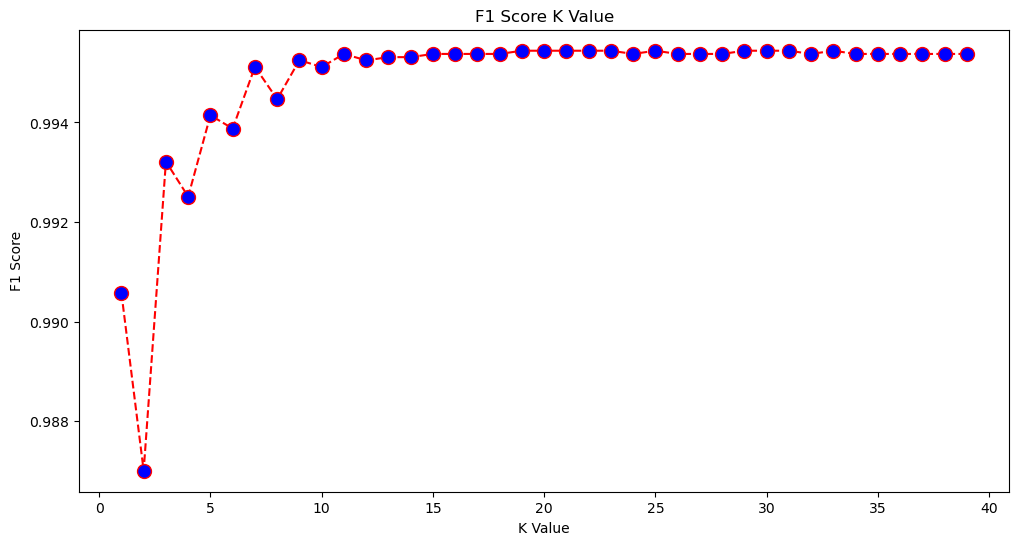

In [48]:
# plot the f1s
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize = 10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

### It appears as the highest f1 value is when K is 19. Zoom in on the plot to be sure by plotting less data:

Text(0, 0.5, 'F1 Score')

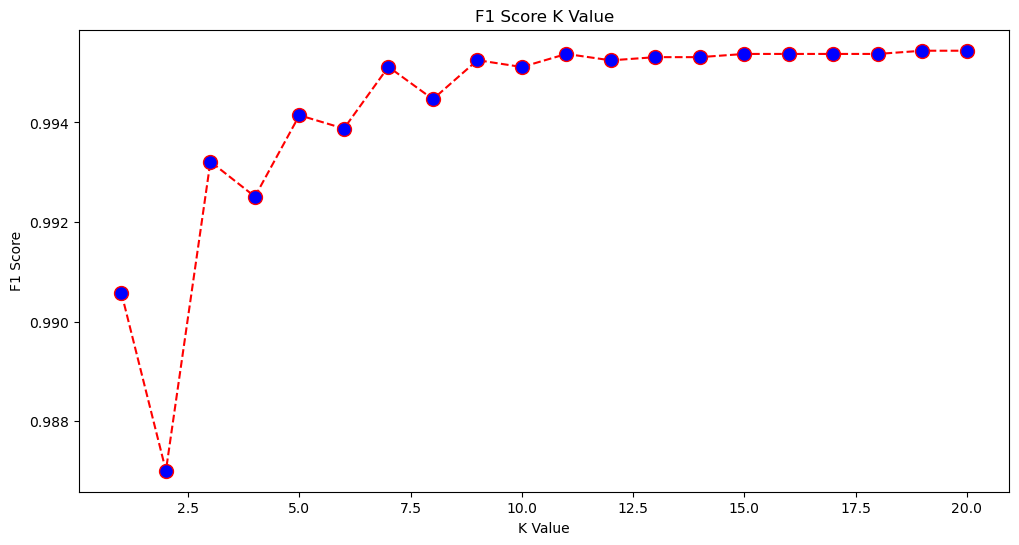

In [49]:
# New f1 plot, less data
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), f1s[:20], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

### Use NP to obtain the highest f1 and the index of that point using the built-in max() function and convert the list into a NumPy array and get the argmax() (index of the element with the lowest value)
##### Hint: started counting neighbors on 1, while arrays are 0-based, so the 18th index is 19 neighbors

In [50]:
# obtain the highest f1 using the built-in max()
print(max(f1s))               # 0.9954401055118394
# convert the list into a NumPy array and use argmax() to get highest index of that point
print(np.array(f1s).argmax()) # 18

0.9954401055118394
18


### execute the KNN classifier model and metrics again with 19 neighbors to classification report results

In [51]:
# retrain classifier with 19 neighbors 
classifier19 = KNeighborsClassifier(n_neighbors = 19)
classifier19.fit(Xnn_train, ynn_train)
ynn_pred19 = classifier19.predict(Xnn_test)

In [52]:
# Generate a confusion matrix for the classifier19 model
ynn19_matrix = confusion_matrix(ynn_test, ynn_pred19)

# Print the confusion matrix for the original test data
print(ynn19_matrix)

[[14940    71]
 [    2   495]]


balanced accuracy score: 0.9956229951824731
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      0.99     15011
          1       0.87      1.00      1.00      0.93      1.00      0.99       497

avg / total       1.00      1.00      1.00      1.00      1.00      0.99     15508



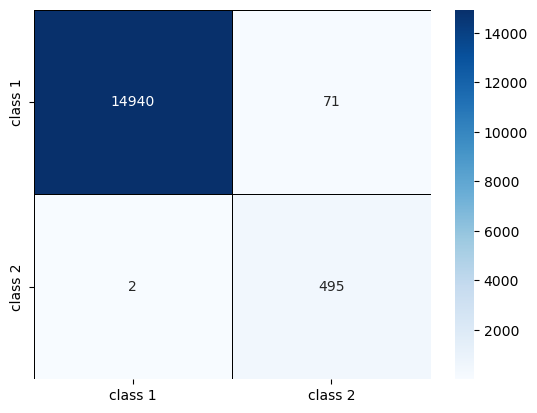

In [53]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(ynn_test, ynn_pred19), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues', linewidth =.5, linecolor = 'black');
# Print the balanced_accuracy score of the classifier19 model
print('balanced accuracy score:', balanced_accuracy_score(ynn_test, ynn_pred19))
# Print the classification report for the classifier19 model
neo19_supp_lend_report = classification_report_imbalanced(ynn_test, ynn_pred19)
print(neo19_supp_lend_report) 

## metrics have improved with 19 neighbors; accuracy is up to 99.56%, precision is the same, higher recall and f1-scores

___

SyntaxError: invalid syntax (3059848851.py, line 1)

In [ ]:
hvplots

In [ ]:
plan to under sample

In [ ]:
use smoteen

___

# Formal Module 12 Challenge Begins Below

______

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [ ]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
borrowers_df = rcsv(
    Path('./Resources/lending_data.csv')
)

# confirm 'keys' and review the DataFrame
display(borrowers_df.columns)
print('\n')
display(borrowers_df.shape)
print('\n')
display(borrowers_df.info())
print('\n')
display(borrowers_df.head(3))

In [ ]:
# Count how many targets category
borrowers_df['loan_status'].value_counts()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = borrowers_df['loan_status']

# Separate the X variable, the features
X = borrowers_df.drop(columns = 'loan_status')
# X = borrowers_df.drop('loan_status', axis=1)
# X = borrowers_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]

In [ ]:
# Review the y variable Series
# list(y)
display(y.sample(3))

In [ ]:
# Review the X variable DataFrame
display(X.sample(3))

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [ ]:
# Check the balance (i.e. magnitude of imbalance) of our target values
y.value_counts()

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
seed = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,               # 80% train : 20% test split
    random_state = seed
)

### inspect datasets' lengths, i.e. review the split

In [ ]:
# inspect the lengths of the full dataset and of split data
display(len(X))           # 77536
display(len(X_train))     # 62028
display(len(X_test))      # 15508

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state = seed)

# Fit the model using training data
lr_original_model = model.fit(X_train, y_train)
lr_original_model

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
y_original_pred = lr_original_model.predict(X_test)
y_original_pred

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_original_pred)

In [ ]:
# Generate a confusion matrix for the model
y_original_matrix = confusion_matrix(y_test, y_original_pred)

# Print the confusion matrix for the original test data
print(y_original_matrix)

In [ ]:
# Print the classification report for the model
original_pred_testing_report = classification_report_imbalanced(y_test, y_original_pred)
print(original_pred_testing_report) 

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [ ]:
# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state = seed)
# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

### Check the number of distinct values (value_counts) for the resampled labels.

In [ ]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state = seed)
# Fit the model using the resampled training data
lr_resampled_model = model.fit(X_resampled, y_resampled)
lr_resampled_model

### Save predictions, using the logistic regression model, predict the values for the resampled sets.

In [ ]:
# Predict the labels for the testing data using the resampled logistic regression model
y_resampled_pred = lr_resampled_model.predict(X_test)
y_resampled_pred

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, y_resampled_pred)

In [ ]:
# Generate a confusion matrix for the model
y_resampled_matrix = confusion_matrix(y_test, y_resampled_pred)

# Print the confusion matrix for the original test data
print(y_resampled_matrix)

In [ ]:
# Print the classification report for the model
resampled_pred_testing_report = classification_report_imbalanced(y_test, y_resampled_pred)

# Print the testing classification report
print(resampled_pred_testing_report)

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!